In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/marketing_data.csv


# Introduction
This notebook will accomplish the following task:

### Overall goal:
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

### Section 01: Exploratory Data Analysis
- Are there any null values or outliers? How will you wrangle/handle them?
- Are there any variables that warrant transformations?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data? Can you plot them?

### Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.
- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
- Is there a significant relationship between geographical regional and success of a campaign?

### Section 03: Data Visualization
Please plot and visualize the answers to the below questions.
- How do buying habits change across education and marital status?
- Which marketing campaign is most successful?
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?

# About

The is a CSV file of 2240 observations (customers) with 28 variables related to marketing data. More specifically, the variables provide insights about:

- Customer profiles
- Products purchased
- Campaign success (or failure)
- Channel performance

ID:
Customer's unique identifier

Year_Birth:
Customer's birth year

Education:
Customer's education level

Marital_Status:
Customer's marital status

Income:
Customer's yearly household income

Kidhome:
Number of children in customer's household

Teenhome:
Number of teenagers in customer's household

Dt_Customer:
Date of customer's enrollment with the company

Recency:
Number of days since customer's last purchase

MntWines:
Amount spent on wine in the last 2 years

MntFruits:
Amount spent on fruits in the last 2 years

MntMeatProducts:
Amount spent on meat in the last 2 years

MntFishProducts:
Amount spent on fish in the last 2 years

MntSweetProducts:
Amount spent on sweets in the last 2 years

MntGoldProds:
Amount spent on gold in the last 2 years

NumDealsPurchases:
Number of purchases made with a discount

NumWebPurchases:
Number of purchases made through the company's web site

NumCatalogPurchases:
Number of purchases made using a catalogue

NumStorePurchases:
Number of purchases made directly in stores

NumWebVisitsMonth:
Number of visits to company's web site in the last month

AcceptedCmp3:
1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4:
1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5:
1 if customer accepted the offer in the 5th campaign, 0 otherwise

AcceptedCmp1:
1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2:
1 if customer accepted the offer in the 2nd campaign, 0 otherwise

Response:
1 if customer accepted the offer in the last campaign, 0 otherwise

Complain:
1 if customer complained in the last 2 years, 0 otherwise

Country:
Customer's location

# 01 Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../input/marketing-data/marketing_data.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Which countries are involved?

In [4]:
data["Country"].unique()

# Spain, Canada, US, Australia, Germany, India, South Africa, Mexico

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

## Are there any null values or outliers?
- Income column has 24 missing values
- Age column has some outliers

### Cleaning the Income column

In [5]:
data = data.rename(columns = {" Income ": "Income"})

In [6]:
# Remove '$' , commas, whitespacesfrom income and convert to an integer

data["Income"] = data["Income"].str.replace(" ", "")
data["Income"] = data["Income"].str.replace(",", "")
data["Income"] = data["Income"].str.replace("$", "")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


In [7]:
data["Income"] = data["Income"].astype(float)

In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

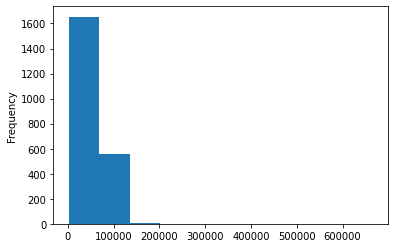

In [9]:
data["Income"].plot.hist()

24 null values for the income column. We will use the median income to fill in the missing values to avoid effects from the outliers.

In [10]:
income_median = data["Income"].median()

In [11]:
data["Income"].fillna(income_median, inplace = True)

### Looking at the values of other columns

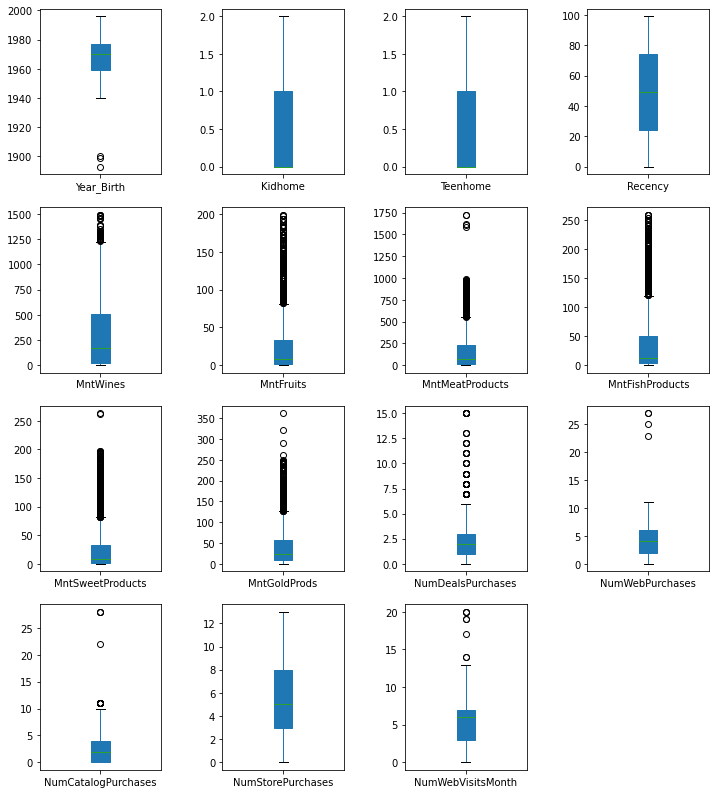

In [12]:
plot = data.drop(columns = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include = int)

plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

### Cleaning the age column

In [13]:
# Get people's age

data["Age"] = 2021 - data["Year_Birth"]

In [14]:
# Remove people older than 100

data.drop(data[data["Age"]>100].index, inplace = True)

<AxesSubplot:ylabel='Frequency'>

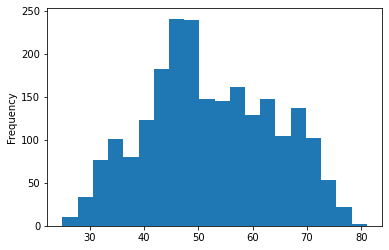

In [15]:
data["Age"].plot.hist(bins = 20)

In [16]:
# Categorize customers into age groups

bins = [0,35,50,65,90]
labels = ["YoungAdult", "MiddleAged", "Aged", "Elderly"]

data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [17]:
data["AgeGroup"].value_counts()

MiddleAged    853
Aged          817
Elderly       420
YoungAdult    147
Name: AgeGroup, dtype: int64

## Are there variables that warrant transformations?
- YrEnroll should be transformed to datetime form.
- Group YrEnroll by year.

### Looking at customer details

In [18]:
# Create a new column showing the year each customer enrolled

data['YrEnroll'] = pd.DatetimeIndex(data['Dt_Customer']).year
data["YrEnroll"].value_counts()

2013    1187
2014     556
2012     494
Name: YrEnroll, dtype: int64

In [19]:
data["Recency"].max()

99

- All customers in the dataset made a purchase in the last 99 days.

## Are there useful variables that can be engineered?

In [20]:
# What is the total number of campaigns accepted? 

cmp = data.iloc[:,[20,21,22,23,24,25]]
cmp["CmpTot"] = cmp.sum(axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
cmp["CmpTot"].value_counts()

0    1629
1     369
2     142
3      51
4      36
5      10
Name: CmpTot, dtype: int64

Customers have accepted more than one campaign, although the majority accept none.

In [22]:
# New column for number of campaigns accepted

data["CmpTot"] = cmp["CmpTot"]

In [23]:
# New column for total amount spent

spent = data.iloc[:,[9, 10, 11, 12, 13, 14]]
spent["MntTot"] = spent.sum(axis = 1)
data["MntTot"] = spent["MntTot"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
# Categorize customers into income groups

bins2 = [0,25000,50000,75000,100000, 900000]
labels2 = ["Low", "Middle", "MiddleUp", "High", "VeryHigh"]

data['IncomeGroup'] = pd.cut(data['Income'], bins = bins2, labels = labels2, right=False)

In [25]:
# New column for total kids

kids = data.iloc[:,[5,6]]
kids["KidTot"] = kids.sum(axis = 1)
data["KidTot"] = kids["KidTot"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
# Total number of purchases

data["PurchasesTot"] = data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

In [27]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Country,Age,AgeGroup,YrEnroll,CmpTot,MntTot,IncomeGroup,KidTot,PurchasesTot
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,SP,51,Aged,2014,1,1190,High,0,14
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,CA,60,Aged,2014,2,577,MiddleUp,0,17
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,US,63,Aged,2014,0,251,MiddleUp,1,10
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,AUS,54,Aged,2014,0,11,Middle,2,3
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,SP,32,YoungAdult,2014,2,91,Low,1,6


## Are there any patterns or anomalies in the data?

To identify patterns, we will first identify feature correlations. Positive correlations between features appear blue, negative correlations appear red, and no correlation appears grey in the clustered heatmap below.

From this heatmap we can observe the following clusters of correlated features:

The "High Income" cluster:
- Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are positively correlated with 'Income'
- Purchasing in store, on the web, or via the catalog ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases') is positively correlated with 'Income'

The "Have Kids & Teens" cluster:
- Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are negatively correlated with 'KidTot' (with a stronger effect from kids vs. teens)
Purchasing deals ('NumDealsPurchases') is positively correlated with 'Dependents' (kids and/or teens) and negatively correlated with 'Income'

The "Advertising Campaigns" cluster:
- Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other
- Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster

Anomalies:
- Surprisingly, the number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increased number of web purchases ('NumWebPurchases')
- Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggesting that suggesting that deals are an effective way of stimulating purchases on the website

/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


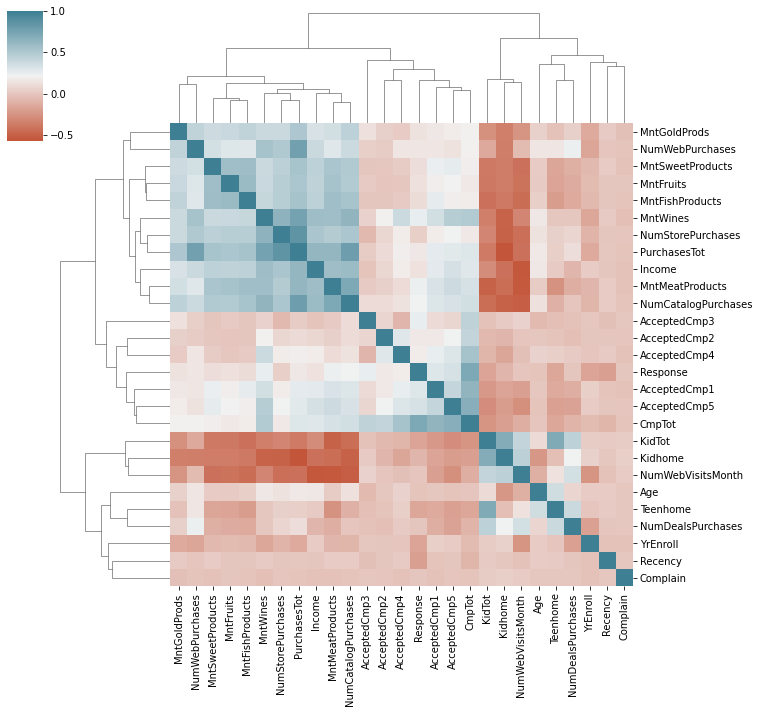

In [28]:
# Pick columns to compare and contrast correlations

import seaborn as sns

compare = ["Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "KidTot", "Recency", "MntWines", "MntFruits", 
           "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumWebVisitsMonth", "NumDealsPurchases", 
           "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "PurchasesTot", "AcceptedCmp3", "AcceptedCmp2", 
           "AcceptedCmp1", "AcceptedCmp4", "AcceptedCmp5", "Response", "CmpTot", "Complain", "Age", "YrEnroll"]

corr = data[compare].corr()

sns.clustermap(corr, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap = sns.diverging_palette(20, 220, n=200), square = True);

In [29]:
corr["NumStorePurchases"].sort_values()

Kidhome               -0.500387
NumWebVisitsMonth     -0.429886
KidTot                -0.321701
YrEnroll              -0.096691
AcceptedCmp3          -0.067988
Complain              -0.011524
Recency                0.001117
Response               0.038855
Teenhome               0.050517
NumDealsPurchases      0.068062
AcceptedCmp2           0.085098
Age                    0.139465
CmpTot                 0.172876
AcceptedCmp4           0.179144
AcceptedCmp1           0.183043
AcceptedCmp5           0.216147
MntGoldProds           0.383264
MntSweetProducts       0.448801
MntFishProducts        0.460099
MntFruits              0.463168
MntMeatProducts        0.480110
NumWebPurchases        0.502277
NumCatalogPurchases    0.518884
Income                 0.527346
MntWines               0.642433
PurchasesTot           0.855399
NumStorePurchases      1.000000
Name: NumStorePurchases, dtype: float64

### How income, kids and campaign acceptance affects the total amount spent

Text(0.5, 1.0, 'Impact of income & total campaign acceptance on total amount spent')

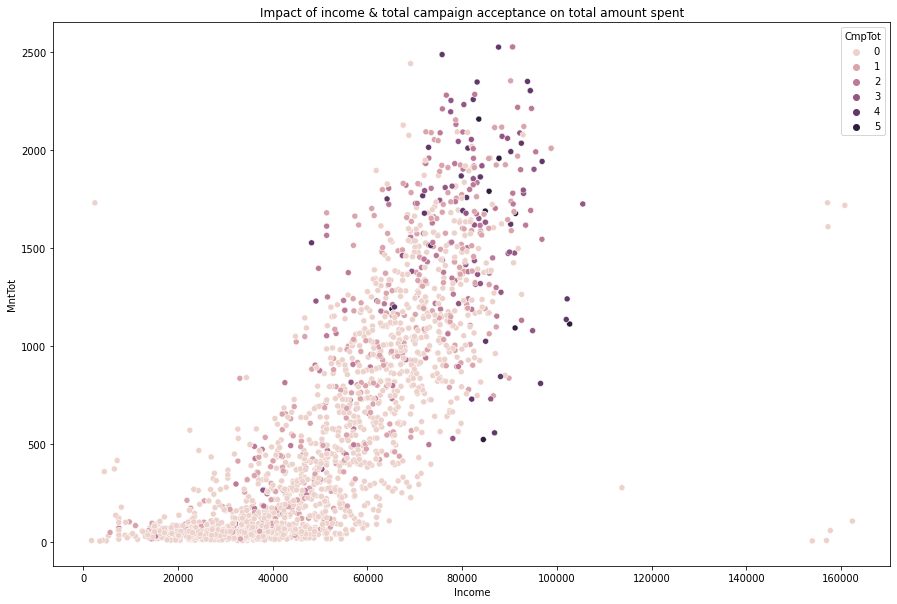

In [30]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="Income", y="MntTot", hue = "CmpTot", data = data[data["Income"]<200000])
ax.set_title("Impact of income & total campaign acceptance on total amount spent")

Text(0.5, 1.0, 'Impact of total campaign acceptance on total amount spent')

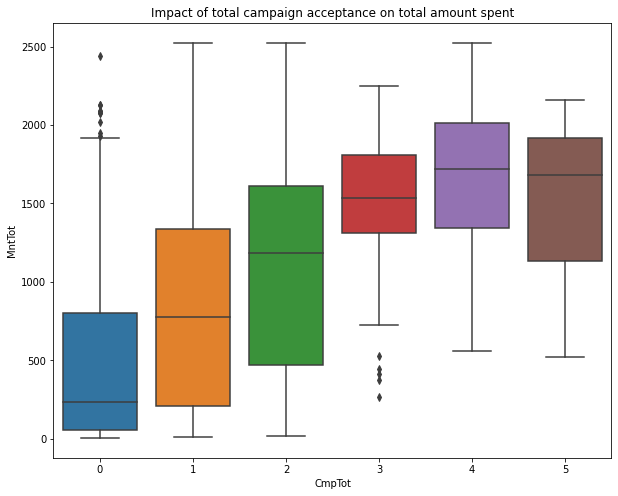

In [31]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='CmpTot', y='MntTot', data=data)
ax.set_title("Impact of total campaign acceptance on total amount spent")

Median amount spent increases as number of accepted campaigns increases to 3 but decreases slightly when 5 campaigns have been accepted. This could be due to the small number of people who accepted 5 campaigns (10 people).

Text(0.5, 1.0, 'Impact of income & total campaign acceptance on total purchases')

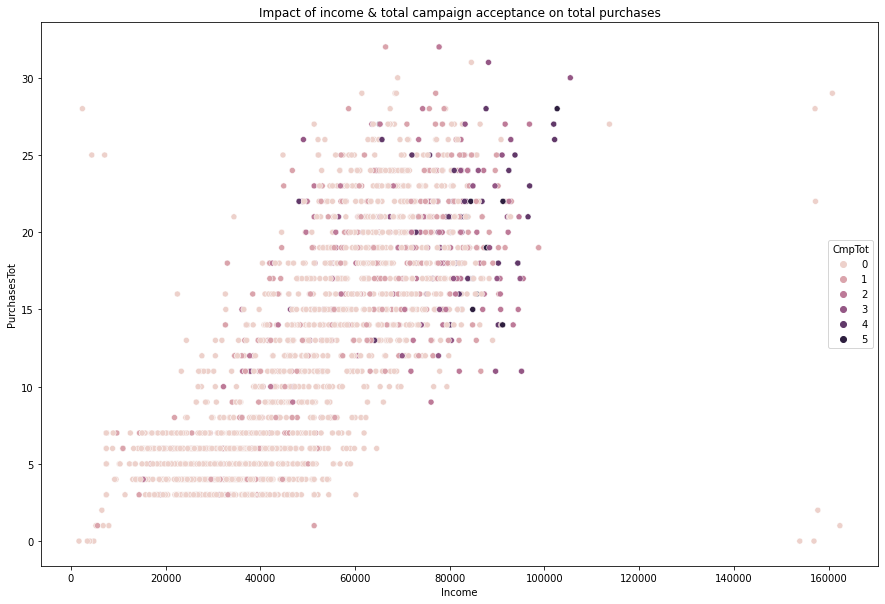

In [32]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="Income", y="PurchasesTot", hue = "CmpTot", data = data[data["Income"]<200000])
ax.set_title("Impact of income & total campaign acceptance on total purchases")

Text(0.5, 1.0, 'Impact of total kids on total amount spent')

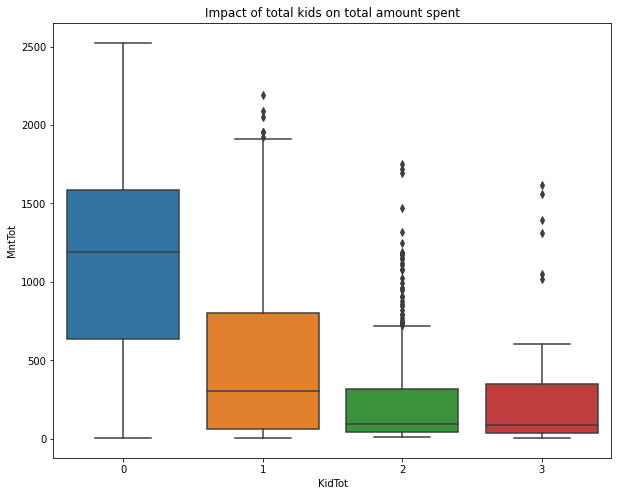

In [33]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="KidTot", y="MntTot", data = data[data["Income"]<200000])
ax.set_title("Impact of total kids on total amount spent")

### Investigating the Anomalies

- No correlation between number of web purchases and web visits per month.
- Positive correlation between number of web and deal purchases.

<Figure size 720x720 with 0 Axes>

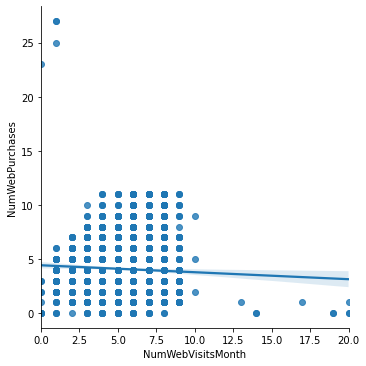

In [34]:
plt.figure(figsize=(10,10))
ax = sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases',  data = data)

<Figure size 720x720 with 0 Axes>

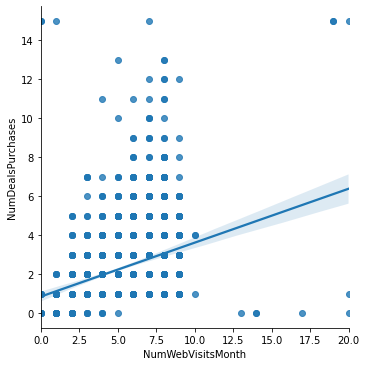

In [35]:
plt.figure(figsize=(10,10))
ax = sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data = data)

# 02 Statistical Analysis

### Factors related to the number of store purchases

Text(0.5, 0, 'Store Purchases')

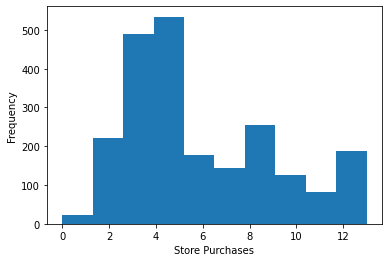

In [36]:
plt.hist(data["NumStorePurchases"])
plt.ylabel("Frequency")
plt.xlabel('Store Purchases')

We will use use a linear regression model with NumStorePurchases as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases.

In [37]:
# drop cols which do not add value or are confounding factors
data2 = data.select_dtypes(['int', 'float64'])

data2.drop(columns = ['ID',"Year_Birth"], inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
# Convert categorical columns into dummies columns
cat = data.select_dtypes(exclude = ["int", 'float64'])
cat.drop(columns = ["Dt_Customer", "AgeGroup", "IncomeGroup"], inplace = True)

In [39]:
cat = pd.get_dummies(cat)

In [40]:
data2 = pd.concat([data2, cat], axis = 1) 

In [41]:
# Normalize values

store = data["NumStorePurchases"]
data_norm = (data2 - data2.min()) / (data2.max() - data2.min())
data_norm['NumStorePurchases'] = store

### Top 3 Variables

In [42]:
# Using RFE to find the most important variables with Logistic Regression

X = data_norm.drop('NumStorePurchases', axis = 1)
y = data['NumStorePurchases']

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

rfe_selector = RFE(estimator= lr,n_features_to_select = 3, step = 1)
rfe_selector.fit(X, y)
rfe_selector.get_support(indices = True)

array([11, 12, 26])

In [43]:
print("Top 3 features affecting store purchases")
top3 = list(data_norm.drop(columns = 'NumStorePurchases', axis = 1).columns[[11,12,26]])
top3

Top 3 features affecting store purchases


['NumWebPurchases', 'NumCatalogPurchases', 'PurchasesTot']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = data_norm[top3]
y = data_norm['NumStorePurchases']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model3 = LinearRegression()
model3.fit(X_train3, y_train3)

# predictions
preds3 = model3.predict(X_test3)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test3, preds3)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  2.3131642018318324e-15
Median value of target variable:  5.0


The best 3 features are
These are:
- Total Purchases
- Number of catalog purchases
- Number of web purchases

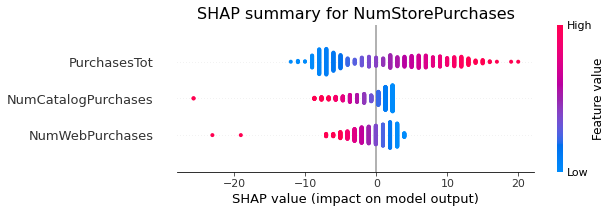

In [45]:
# Explore the directionality of these effects, using SHAP values

import shap

# calculate shap values 
ex = shap.Explainer(model3, X_train3)
shap_values = ex(X_test3)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

The SHAP values tell us that the number of store purchases increases when: 
- The total number of purchases increases
- The number of catalog and web purchases decreases

Insights:
- Customers who shop in store frequently do not shop via catalog and web.
- As store purchases always affects the total number purchases, a large proportion of each customer's shopping method could be through the in-store channel.

### Does US fare significantly better than the Rest of the World in terms of total purchases?

Text(0.5, 1.0, 'Total purchases by country')

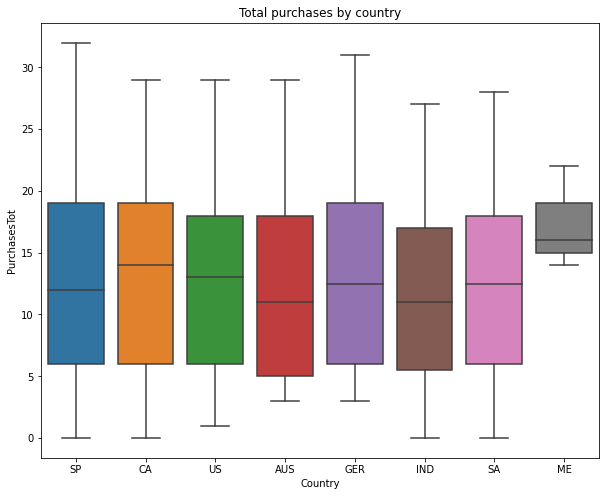

In [46]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Country", y="PurchasesTot", data = data)
ax.set_title("Total purchases by country")

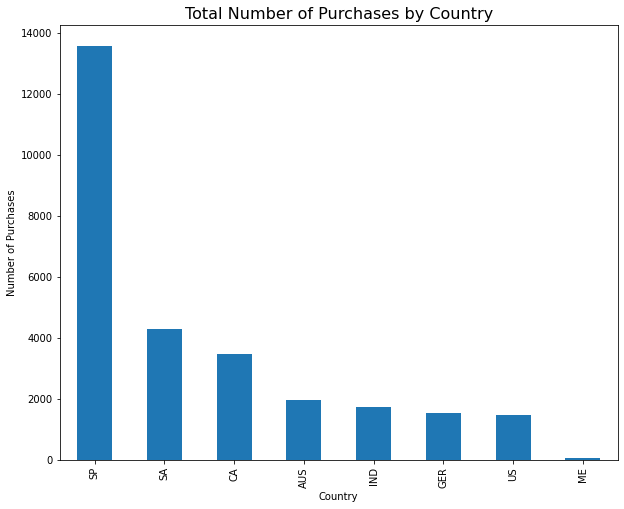

In [47]:
plt.figure(figsize=(10,8))
data.groupby('Country')['PurchasesTot'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

While the US has the second highest median for purchases per country, it actually ranks second lowest in terms of sum of total purchases per country. This suggests the US has a smaller consumer base as shown in the pie chart below.

<AxesSubplot:title={'center':'Customer size by country'}, ylabel='Country'>

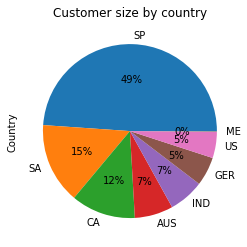

In [48]:
data["Country"].value_counts().plot(kind='pie', autopct='%1.0f%%', title = 'Customer size by country')

Let's have a look at total amount spent by country to see what the trends are

Text(0.5, 1.0, 'Total amount spent by country')

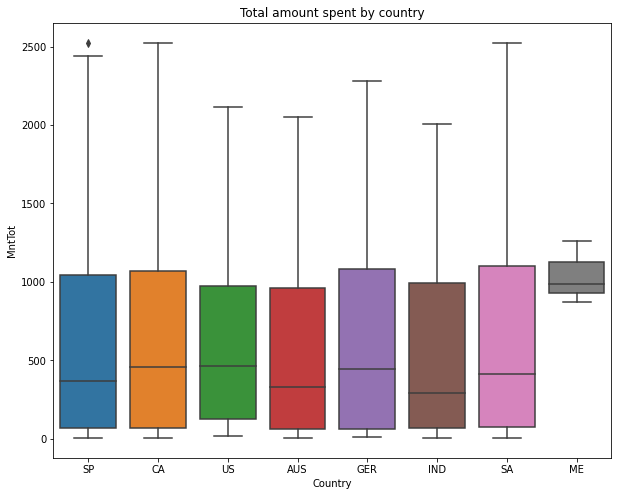

In [49]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Country", y="MntTot", data = data)
ax.set_title("Total amount spent by country")

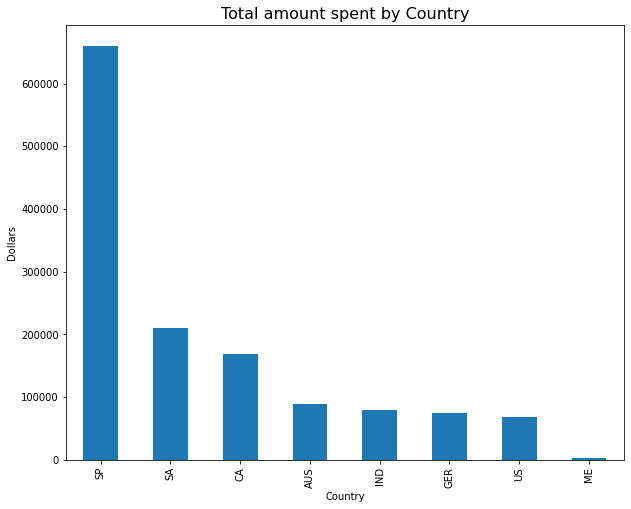

In [50]:
plt.figure(figsize=(10,8))
data.groupby('Country')['MntTot'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total amount spent by Country', size=16)
plt.ylabel('Dollars');

<AxesSubplot:title={'center':'Customer spending by country'}, ylabel='MntTot'>

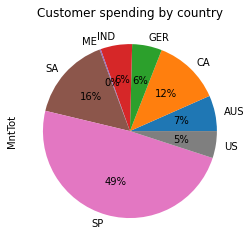

In [51]:
data.groupby('Country')['MntTot'].sum().plot(kind='pie', autopct='%1.0f%%', 
                                             title = 'Customer spending by country')

The make up of customer spending by country is similar to that of customer size by country, indicating, that average spending by customer in each country does not vary by large amounts. The Middle East is an exception with much higher median spend and number of purchases, however, the customer size is too small at 0% to have an impact on the overall statistics.

### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.

In [52]:
gold_mean = np.mean(data["MntGoldProds"])

bins3 = [0,43.97,400]
labels3 = ["Low gold", "High gold"]

data['Golddigger'] = pd.cut(data['MntGoldProds'], bins = bins3, labels = labels3, right=False)


Text(0.5, 1.0, 'Impact of income & total campaign acceptance on total purchases')

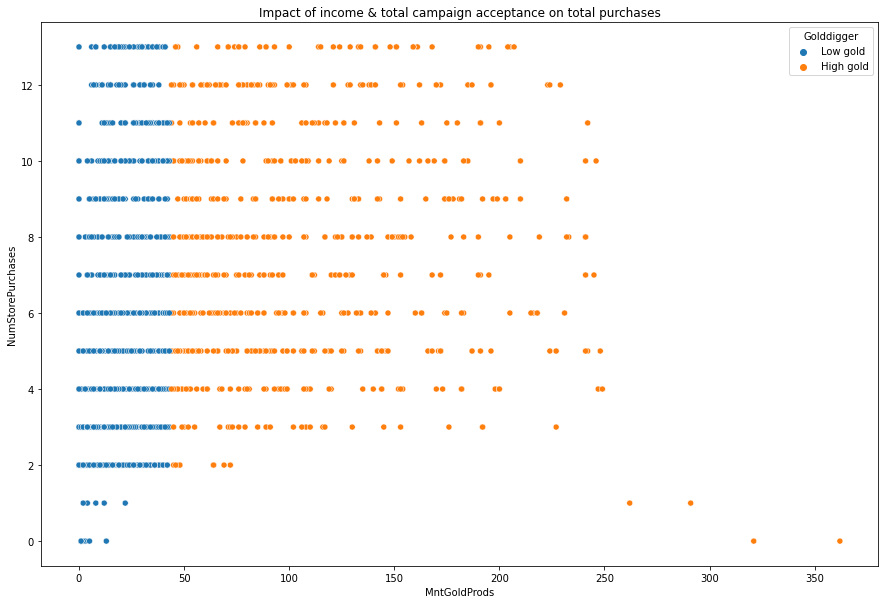

In [53]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="MntGoldProds", y="NumStorePurchases", hue = "Golddigger", data = data)
ax.set_title("Impact of income & total campaign acceptance on total purchases")

In [54]:
gold_corr = data[["NumStorePurchases", "MntGoldProds"]].corr()
gold_corr

,NumStorePurchases,MntGoldProds
NumStorePurchases,1.000000,0.383264
MntGoldProds,0.383264,1.000000


There seems to be a positive correlation with a few outliers. However, is this correlation significant?
We will use Kendall's rank coefficent to find out.

In [55]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=data['MntGoldProds'], y=data['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


There is significant positive correlation between MntGoldProds and NumStorePurchases.

### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?

In [56]:
data['mp'] = np.where((data["Marital_Status"] == "Married") & (data["Education"] == "PhD"), 1, 0)

<AxesSubplot:xlabel='mp', ylabel='MntFishProducts'>

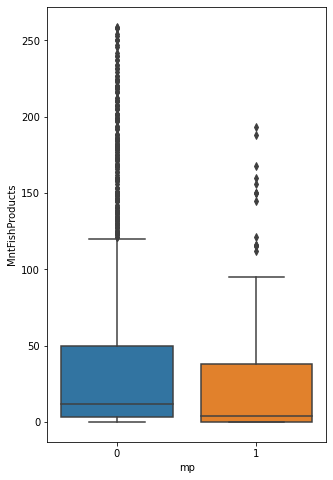

In [57]:
plt.figure(figsize=(5,8))
sns.boxplot(x = "mp", y='MntFishProducts', data=data)

In [58]:
# independent t-test p-value

from scipy.stats import ttest_ind

pval = ttest_ind(data[data['mp'] == 1]['MntFishProducts'], data[data['mp'] == 0]['MntFishProducts']).pvalue
t_stat = ttest_ind(data[data['mp'] == 1]['MntFishProducts'], data[data['mp'] == 0]['MntFishProducts']).statistic

print("t-test t-stat: ", round(t_stat, 3))
print("t-test p-value: ", round(pval, 3))

t-test t-stat:  -2.791
t-test p-value:  0.005


Married PhD candidates spend significantly less on fish products compared to other customers. While there is a correlation, the hypothesis was incorrect.

### What other factors influence consumption of fish?

In [59]:
# isolate X and y variables, and perform train-test split
X = data_norm.drop(columns='MntFishProducts')
y = data['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  1.3146635884350599e-12
Median value of target variable:  12.0


The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions

In [60]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

Top 3 factors affecting consumption of fish:
- Total Amount Spent
- Amount spent on wine
- Amount spent on meat

In [61]:
# Using correlation to select variables 

fish_corr = abs(data_norm.corr()["MntFishProducts"].sort_values()).drop(["MntFishProducts"])
fish_corr

NumWebVisitsMonth          0.445760
KidTot                     0.425136
Kidhome                    0.387536
Teenhome                   0.203900
NumDealsPurchases          0.139440
Education_PhD              0.105502
YrEnroll                   0.067306
Education_Basic            0.058928
Education_Master           0.044193
Marital_Status_Married     0.031108
Country_IND                0.022883
Marital_Status_Alone       0.020028
Complain                   0.018818
Marital_Status_YOLO        0.018357
Marital_Status_Divorced    0.014651
Country_SP                 0.014556
Country_AUS                0.005388
Country_CA                 0.000710
AcceptedCmp3               0.000370
Recency                    0.001532
AcceptedCmp2               0.002583
Marital_Status_Single      0.007251
Country_GER                0.009597
Country_US                 0.013189
Marital_Status_Together    0.014670
AcceptedCmp4               0.016864
Country_SA                 0.024171
Country_ME                 0

In [62]:
# Choose variables with an absolute correlation value of over 0.5
fish_corr[fish_corr >0.5].index.tolist()

['NumCatalogPurchases',
 'PurchasesTot',
 'MntMeatProducts',
 'MntSweetProducts',
 'MntFruits',
 'MntTot']

In [63]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def model(features):
    X = data_norm[features]
    y = data["MntFishProducts"]
    cv = KFold(n_splits = 10, random_state = 1, shuffle = True)
    lr = LinearRegression()
    fish_pred = cross_val_predict(lr,X,y,cv=cv)

    print("RMSE: " + str(round(sqrt(mean_squared_error(y, fish_pred)),2)))
    print("R_squared: " + str(round(r2_score(y, fish_pred),2)))
    

In [64]:
model(fish_corr[fish_corr >0.5].index.tolist())

RMSE: 38.55
R_squared: 0.5


Very high RMSE given that the median target variable is 12. Will try other combinations of features.

In [65]:
vals = [0.1, 0.2, 0.3, 0.4]
for val in vals:
    model(fish_corr[fish_corr > val].index.tolist())

RMSE: 0.0
R_squared: 1.0
RMSE: 0.0
R_squared: 1.0
RMSE: 0.0
R_squared: 1.0
RMSE: 38.1
R_squared: 0.51


When variables with a correlation of over 0.3 is selected, it can predict amount spent on fish to a high accuracy as seen by the RMSE value of 0.

In [66]:
# List of variables with correlation above 0.3

fish_corr[fish_corr > 0.3].index.tolist()

['NumWebVisitsMonth',
 'KidTot',
 'Kidhome',
 'MntWines',
 'MntGoldProds',
 'Income',
 'NumStorePurchases',
 'NumCatalogPurchases',
 'PurchasesTot',
 'MntMeatProducts',
 'MntSweetProducts',
 'MntFruits',
 'MntTot']

### Does the US perform better when it comes to accepting campaigns?

In [67]:
cmp_country = data.iloc[:,[20,21,22,23,24,25,27,31]]
cmp_country["success_rate"] = cmp_country["CmpTot"]/6
cmp_country.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Country,CmpTot,success_rate
0,0,0,0,0,0,1,SP,1,0.166667
1,0,0,0,0,1,1,CA,2,0.333333
2,0,0,0,0,0,0,US,0,0.000000
3,0,0,0,0,0,0,AUS,0,0.000000
4,1,0,0,0,0,1,SP,2,0.333333


<AxesSubplot:title={'center':'Total campaign success rate'}, xlabel='Country'>

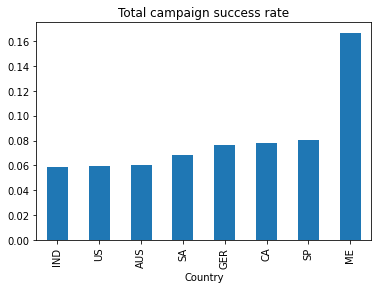

In [68]:
cmp_country.groupby("Country")['success_rate'].mean().sort_values().plot(kind = 'bar', 
                                                                   title = 'Total campaign success rate')



<AxesSubplot:title={'center':'Average campaigns accepted'}, xlabel='Country'>

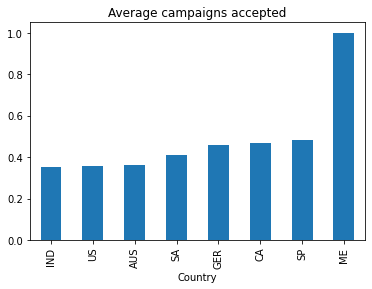

In [69]:
cmp_country.groupby("Country")['CmpTot'].mean().sort_values().plot(kind = 'bar', 
                                                                   title = 'Average campaigns accepted')


### Break down performance by campaign

In [70]:
# Unpivot a DataFrame from wide to long format, optionally leaving identifiers set. This function is useful 
# to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), 
# while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, 
# leaving just two non-identifier columns, ‘variable’ and ‘value’.

data['Country_code'] = data['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'ARE'})

# success of campaigns by country code
df_cam = data[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')

df_cam.head(15)


,Country_code,Campaign,Accepted (%)
0,ESP,AcceptedCmp1,0
1,CAN,AcceptedCmp1,0
2,USA,AcceptedCmp1,0
3,AUS,AcceptedCmp1,0
4,ESP,AcceptedCmp1,0
5,ESP,AcceptedCmp1,0
6,GER,AcceptedCmp1,0
7,ESP,AcceptedCmp1,0
8,USA,AcceptedCmp1,0
9,IND,AcceptedCmp1,0


In [71]:
data_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)
data_cam.head(15)

,Country_code,Campaign,Accepted (%)
0,ARE,AcceptedCmp1,0.000000
1,ARE,AcceptedCmp2,0.000000
2,ARE,AcceptedCmp3,33.333333
3,ARE,AcceptedCmp4,0.000000
4,ARE,AcceptedCmp5,0.000000
5,ARE,Response,66.666667
6,AUS,AcceptedCmp1,4.375000
7,AUS,AcceptedCmp2,0.000000
8,AUS,AcceptedCmp3,5.625000
9,AUS,AcceptedCmp4,3.750000


In [72]:
# rename the campaign variables so they're easier to interpret
data_cam['Campaign'] = data_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

# choropleth plot
import plotly.express as px

fig = px.choropleth(data_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.1, facet_col_spacing=0.01, width=900,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

In [73]:
# calculate logistic regression p-values for campaign acceptance ~ country using generalized linear model
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

## get the data of interest for glm
glm = data[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

## to store statistics results
stat = []

## perform glm
for col in glm.drop(columns='Country').columns:
    this_data = glm[['Country', col]]


    # define formula
    formula = col+'~Country'

    
    # logistic regression (family=binomial)
    model = smf.glm(formula = formula, data=this_data, family=sm.genmod.families.Binomial())
    result = model.fit()
    
    # get chisquare value for overall model (CampaignAccepted ~ Country) and calculate p-value
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq , 7) # Df Model = 7 degrees of freedom when you run result.summary()
     
    # append to stat_results
    stat.append(pval)
    
    # print stat summary for entire model
    print(result.summary())
    
## check results
print("\nChisq p-values: ", stat)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AcceptedCmp1   No. Observations:                 2237
Model:                            GLM   Df Residuals:                     2229
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.52
Date:                Sat, 11 Sep 2021   Deviance:                       1065.0
Time:                        17:05:16   Pearson chi2:                 2.23e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0845      0.387     -7.

# 03 Visualizing Data

### How do buying habits change based on education and marital status?

In [74]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'AgeGroup',
       'YrEnroll', 'CmpTot', 'MntTot', 'IncomeGroup', 'KidTot', 'PurchasesTot',
       'Golddigger', 'mp', 'Country_code'],
      dtype='object')

### Marital status and consumption habits

In [75]:
data["Marital_Status"].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [76]:
# Cleaning the marital status data

data["Marital_Status"] = data["Marital_Status"].str.replace("YOLO", "Single")
data["Marital_Status"] = data["Marital_Status"].str.replace("Alone", "Single")
data["Marital_Status"] = data["Marital_Status"].str.replace("Absurd", "Single")
data["Marital_Status"] = data["Marital_Status"].str.replace("Together", "Dating")                                                        

In [77]:
marital = pd.pivot_table(data, values = ("MntWines", "MntFruits",
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'),index = data["Marital_Status"], aggfunc = np.mean)
marital

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Marital_Status,,,,,,
Dating,38.879102,25.145078,42.682211,167.423143,26.056995,306.051813
Divorced,35.164502,27.519481,46.380952,150.822511,26.917749,326.186147
Married,35.380787,25.734954,42.822917,160.681713,26.701389,299.480324
Single,38.639918,26.888889,44.364198,181.504115,27.106996,288.683128
Widow,51.389610,33.090909,56.766234,189.285714,39.012987,369.272727


Text(0.5, 0.98, 'Spending Habits Based on Marital Status')

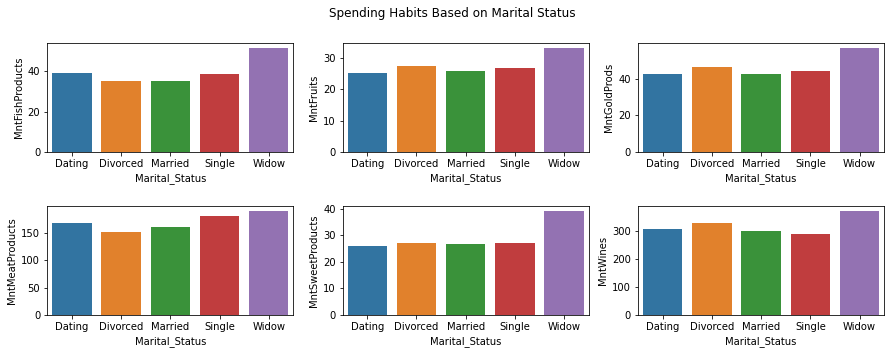

In [78]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5), sharey=False)

sns.barplot(x = marital.index, y='MntFishProducts', data=marital, ax= axs[0,0])
sns.barplot(x = marital.index, y='MntFruits', data=marital, ax= axs[0,1])
sns.barplot(x = marital.index, y='MntGoldProds', data=marital, ax= axs[0,2])
sns.barplot(x = marital.index, y='MntMeatProducts', data=marital, ax= axs[1,0])
sns.barplot(x = marital.index, y='MntSweetProducts', data=marital, ax= axs[1,1])
sns.barplot(x = marital.index, y='MntWines', data=marital, ax= axs[1,2])

plt.subplots_adjust(hspace=0.5);

fig.suptitle("Spending Habits Based on Marital Status")

- Widows spend more across all categories.
- Create targeted campaigns geared towards individual tastes and preferences.

In [79]:
marital_channel = pd.pivot_table(data, values = ('NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases'),index = data["Marital_Status"], aggfunc = np.mean)
marital_channel

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases
Marital_Status,,,,
Dating,2.670121,2.326425,5.739206,4.081174
Divorced,2.679654,2.441558,5.835498,4.320346
Married,2.625000,2.392361,5.850694,4.087963
Single,2.606996,2.154321,5.641975,3.897119
Widow,3.324675,2.337662,6.415584,4.623377


Text(0.5, 0.98, 'Buying Channels Based on Marital Status')

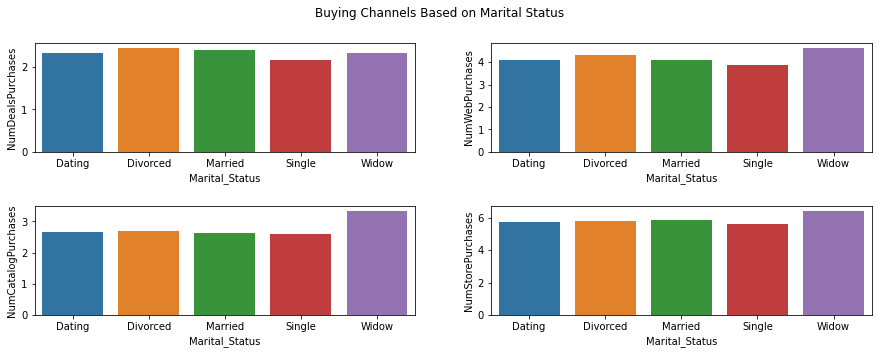

In [80]:
fig, axs = plt.subplots(2, 2, figsize=(15, 5), sharey=False)

sns.barplot(x = marital_channel.index, y='NumDealsPurchases', data=marital_channel, ax= axs[0,0])
sns.barplot(x = marital_channel.index, y='NumWebPurchases', data=marital_channel, ax= axs[0,1])
sns.barplot(x = marital_channel.index, y='NumCatalogPurchases', data=marital_channel, ax= axs[1,0])
sns.barplot(x = marital_channel.index, y='NumStorePurchases', data=marital_channel, ax= axs[1,1])

plt.subplots_adjust(hspace=0.5);

fig.suptitle("Buying Channels Based on Marital Status")

- There is not much variation between marital statuses and purchasing channels. 
- Widows have a higher average for most channels as they consume more based on number and value of purchases.

### Education and Consumption Habits

In [81]:
data["Education"].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [82]:
# Cleaning the education column

data["Education"] = data["Education"].str.replace("Graduation", "Bachelor")
data["Education"] = data["Education"].str.replace("Basic", "Highschool")

In [83]:
education = pd.pivot_table(data, values = ("MntWines", "MntFruits",
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'),index = data["Education"], aggfunc = np.mean)
education

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Education,,,,,,
2n Cycle,47.885572,29.213930,46.726368,142.597015,34.572139,200.039801
Bachelor,43.149956,30.774623,50.849157,179.488909,31.367347,284.268855
Highschool,17.055556,11.111111,22.833333,11.444444,12.111111,7.240741
Master,32.100000,21.654054,40.397297,163.378378,21.175676,333.075676
PhD,26.569072,19.793814,31.915464,167.791753,20.131959,403.773196


Text(0.5, 0.98, 'Spending Habits Based on Education Levels')

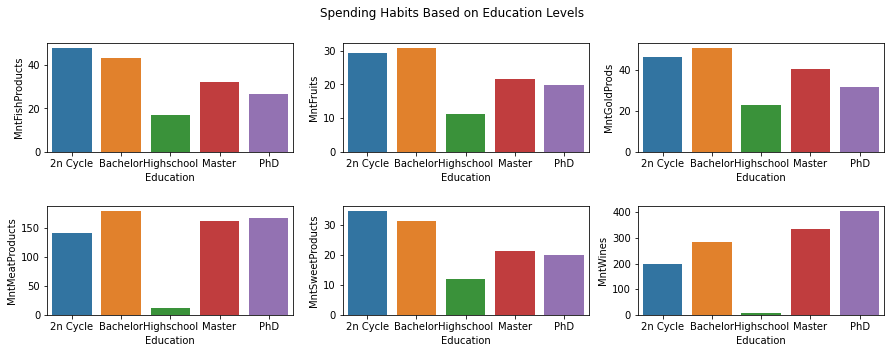

In [84]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5), sharey=False)

sns.barplot(x = education.index, y='MntFishProducts', data=education, ax= axs[0,0])
sns.barplot(x = education.index, y='MntFruits', data=education, ax= axs[0,1])
sns.barplot(x = education.index, y='MntGoldProds', data=education, ax= axs[0,2])
sns.barplot(x = education.index, y='MntMeatProducts', data=education, ax= axs[1,0])
sns.barplot(x = education.index, y='MntSweetProducts', data=education, ax= axs[1,1])
sns.barplot(x = education.index, y='MntWines', data=education, ax= axs[1,2])

plt.subplots_adjust(hspace=0.5);

fig.suptitle("Spending Habits Based on Education Levels")

- Highschool individuals generally spend a lot less across all categories, especially for meat products and wine.
- PhD individuals spend a lot more on wine. This could be due to their higher income.
- Bachelor individuals spend more than Master individuals across all categories except wines.

In [85]:
edu_channel = pd.pivot_table(data, values = ('NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases'),index = data["Education"], aggfunc = np.mean)
edu_channel

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases
Education,,,,
2n Cycle,2.338308,2.258706,5.542289,3.751244
Bachelor,2.725821,2.309672,5.829636,4.125111
Highschool,0.481481,1.796296,2.851852,1.888889
Master,2.570270,2.427027,5.897297,4.032432
PhD,2.962887,2.377320,6.065979,4.424742


Text(0.5, 0.98, 'Buying Channels Based on Education Level')

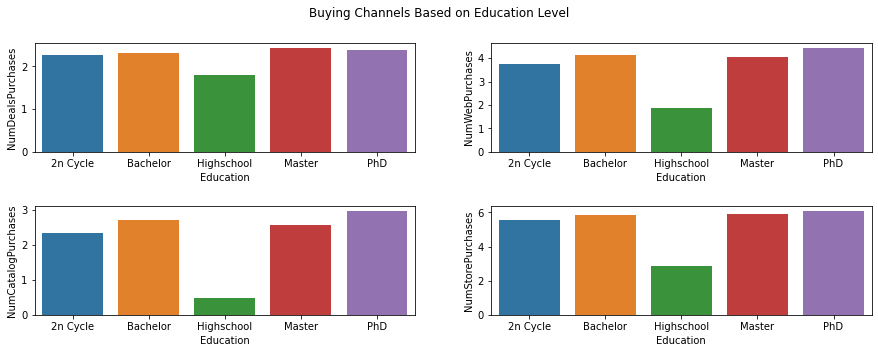

In [86]:
fig, axs = plt.subplots(2, 2, figsize=(15, 5), sharey=False)

sns.barplot(x = edu_channel.index, y='NumDealsPurchases', data=edu_channel, ax= axs[0,0])
sns.barplot(x = edu_channel.index, y='NumWebPurchases', data=edu_channel, ax= axs[0,1])
sns.barplot(x = edu_channel.index, y='NumCatalogPurchases', data=edu_channel, ax= axs[1,0])
sns.barplot(x = edu_channel.index, y='NumStorePurchases', data=edu_channel, ax= axs[1,1])

plt.subplots_adjust(hspace=0.5);

fig.suptitle("Buying Channels Based on Education Level")

### Which campaign performed best?

Text(0.5, 0.98, 'Total Amount Spent vs Campaigns Accepted')

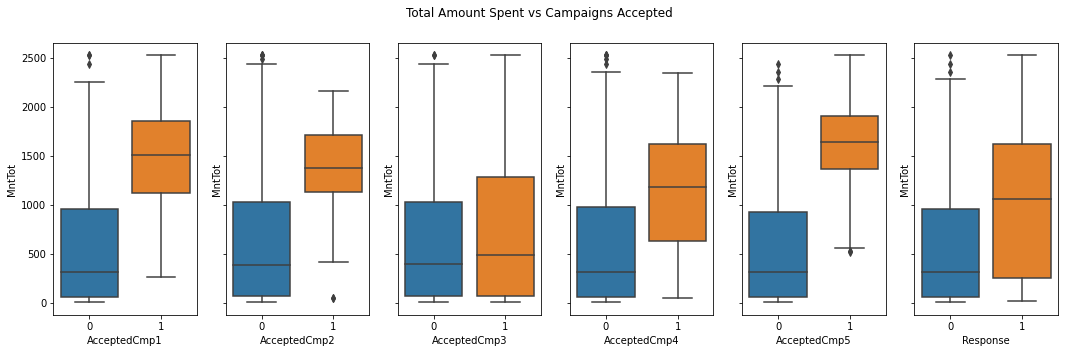

In [87]:
fig, axs = plt.subplots(1, 6, figsize=(18, 5), sharey=True)

sns.boxplot(x = "AcceptedCmp1", y='MntTot', data=data, ax= axs[0])
sns.boxplot(x = "AcceptedCmp2", y='MntTot', data=data, ax= axs[1])
sns.boxplot(x = "AcceptedCmp3", y='MntTot', data=data, ax= axs[2])
sns.boxplot(x = "AcceptedCmp4", y='MntTot', data=data, ax= axs[3])
sns.boxplot(x = "AcceptedCmp5", y='MntTot', data=data, ax= axs[4])
sns.boxplot(x = "Response", y='MntTot', data=data, ax= axs[5])

fig.suptitle("Total Amount Spent vs Campaigns Accepted")

- Accepting campaigns generally leads to higher median spending with little effects from Campaign 3. 
- Campaign 1 and 5 seemed to perform best based on its effects on total amount spent.

### What does the average customer look like for this company?

<AxesSubplot:>

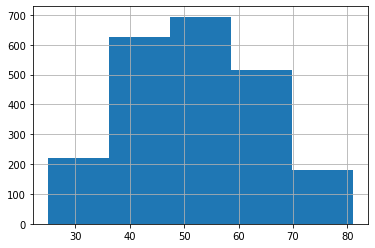

In [96]:
data["Age"].hist(bins = 5)

<AxesSubplot:>

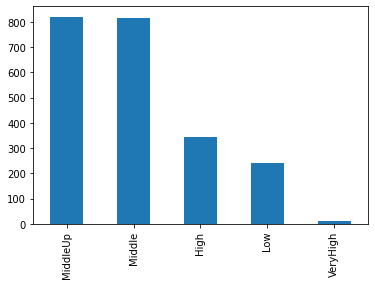

In [108]:
data["IncomeGroup"].value_counts().plot.bar()

<AxesSubplot:>

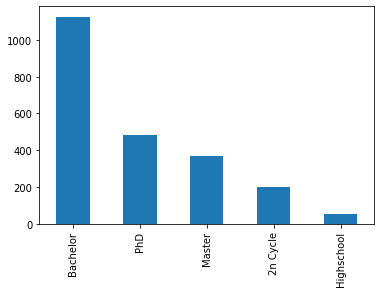

In [109]:
data["Education"].value_counts().plot.bar()

<AxesSubplot:>

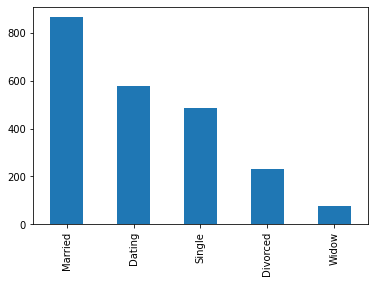

In [110]:
data["Marital_Status"].value_counts().plot.bar()

- Most customers are between 35 and 60.
- Most customers are married or have a partner.
- Most customers have devent levels of disposable income.
- Most customers have a Bachelors. Few in Highschool.

### Which products are performing best?

<AxesSubplot:>

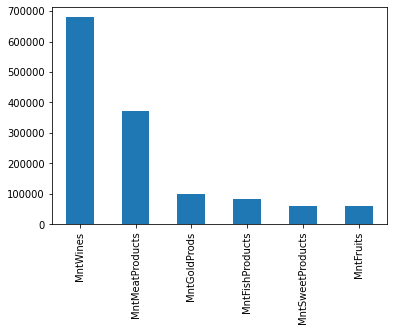

In [117]:
data[["MntWines", "MntFruits", 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum().sort_values(ascending = False).plot.bar()

In [132]:
country_cat = pd.pivot_table(data, values = ("MntWines", "MntFruits", 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                                             'MntGoldProds'),index = data["Country"], aggfunc = np.sum)

<AxesSubplot:xlabel='Country'>

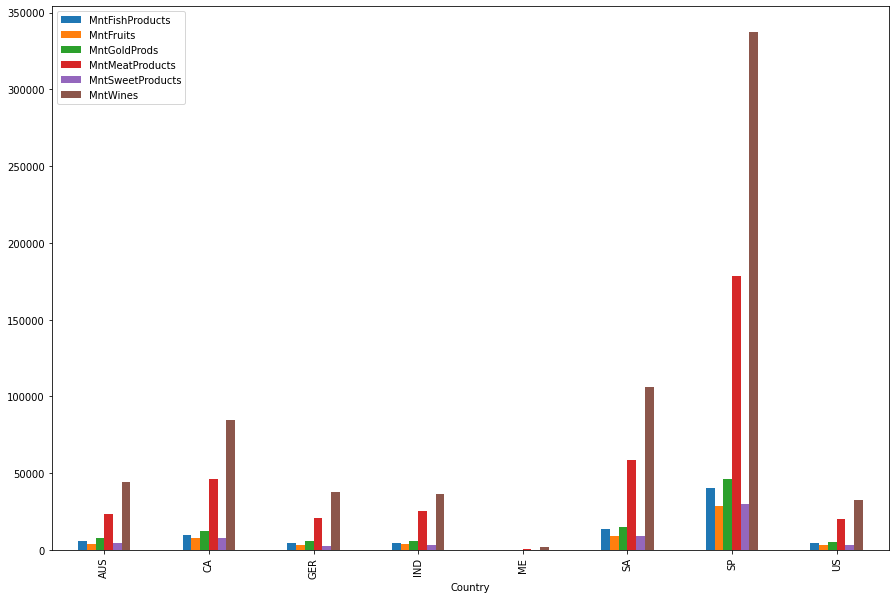

In [133]:
country_cat.plot.bar(figsize=(15,10))

Globally, Wines and Meat Products are performing best in terms of value sold.
When looking at this by country, the consumption by category follows the global pattern.

### Which channels are underperforming?

<AxesSubplot:>

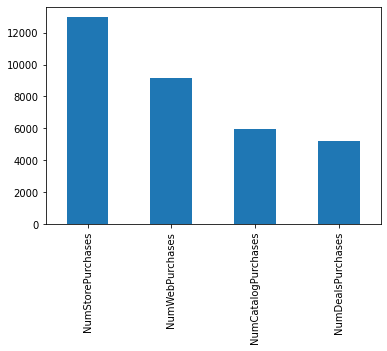

In [118]:
data[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending = False).plot.bar()

In [130]:
country_channel = pd.pivot_table(data, values = ('NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases'),index = data["Country"], aggfunc = np.sum)

<AxesSubplot:xlabel='Country'>

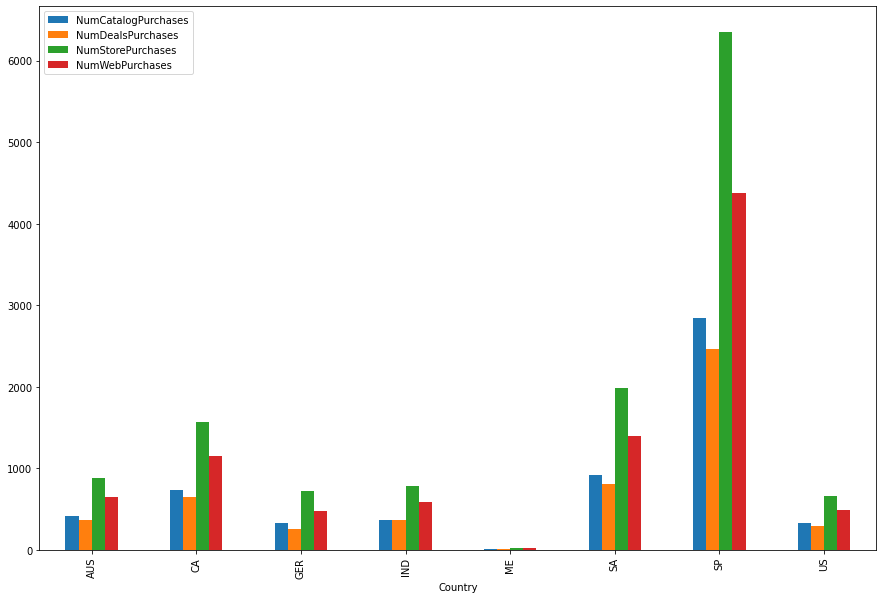

In [129]:
country_channel.plot.bar(figsize=(15,10))

Globally, deals purchases is underperforming in terms of total purchases.
When looking at this by country (except for India), the purchases by chabbel follows the global pattern
The number of catalog and deal purchases in India is very similar unlike the other countries where catalog purchases is much higher.